# Data Visualization

The aviation accident database throughout the world, from 1908-2019.

* All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, which resulted in a fatality (including all U.S. Part 121 and Part 135 fatal accidents)
* All cargo, positioning, ferry and test flight fatal accidents.
* All military transport accidents with 10 or more fatalities.
* All commercial and military helicopter accidents with greater than 10 fatalities.
* All civil and military airship accidents involving fatalities.
* Aviation accidents involving the death of famous people.
* Aviation accidents or incidents of noteworthy interest.

Data was scrapped from the Plane Crash info website (http://www.planecrashinfo.com/database.htm)

You can download this dataset from https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908

## Data Cleaning

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import datetime as dt

df = pd.read_csv('Airplane_Crashes.csv')

In [4]:
print(df.shape)
df.head()

(4967, 17)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [5]:
dict_errors = {'c: ':'', 'c:':'', 'c':'', '12\'20':'12:20', 
              '18.40':'18:40', '0943':'09:43', '22\'08':'22:08', '114:20':'00:00',
              '91:5':'9:15', '90:0':'9:00', '24:5':'2:45'}

for key,val in dict_errors.items():
    df['Time'] = df['Time'].str.replace(key, val)

    
df['DateTime'] = df['Date'] + ' ' + df['Time']

df = df[df['DateTime'].notnull()]

df['DateTime'] = pd.to_datetime(df['DateTime'])

print(df.shape)
df.head()

(3457, 18)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,DateTime
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00
6,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...,1915-03-05 01:00:00


In [6]:
df.dtypes

Date                             object
Time                             object
Location                         object
Operator                         object
Flight #                         object
Route                            object
AC Type                          object
Registration                     object
cn/ln                            object
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                          object
DateTime                 datetime64[ns]
dtype: object

# Accidents by year, month, day, hour

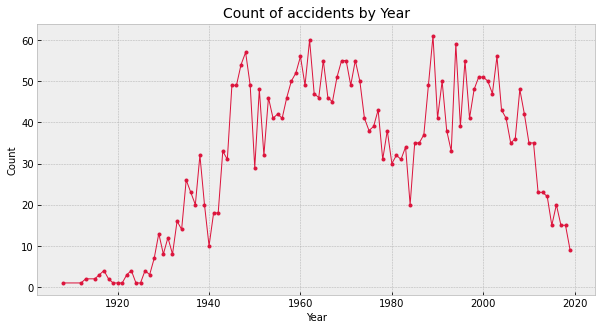

In [7]:
temp = df.groupby(df.DateTime.dt.year)[['DateTime']].count()

plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.plot(temp.index, 'DateTime', data=temp, color='crimson', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

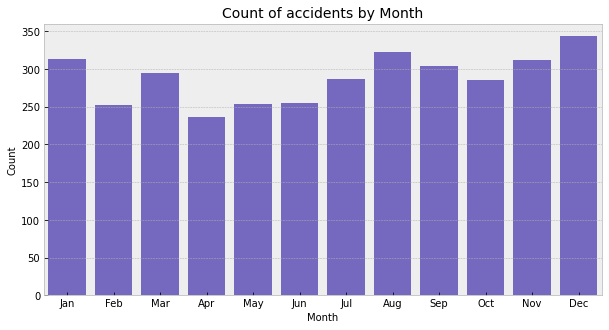

In [8]:
temp_month = df.groupby(df.DateTime.dt.month)[['DateTime']].size().to_frame('Count').reset_index()

plt.style.use('bmh')
plt.figure(figsize=(10,5))
sns.barplot('DateTime', 'Count', data=temp_month, color='slateblue', linewidth=2)
plt.xticks(temp_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14);

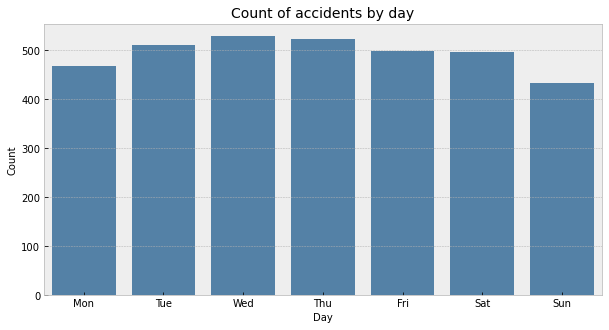

In [9]:
temp_day = df.groupby(df.DateTime.dt.weekday)[['DateTime']].size().to_frame('Count').reset_index()

plt.figure(figsize=(10,5))
plt.style.use('bmh')
sns.barplot('DateTime', 'Count', data=temp_day, color='steelblue', linewidth=2)
plt.xticks(temp_day.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by day', loc='Center', fontsize=14);

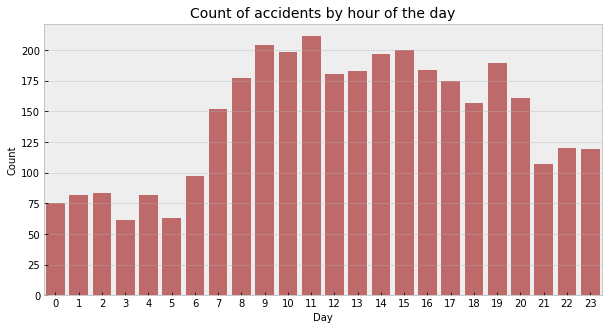

In [10]:
temp_hour = df.groupby(df.DateTime.dt.hour)[['DateTime']].size().to_frame('Count').reset_index()

plt.figure(figsize=(10,5))
plt.style.use('bmh')
sns.barplot('DateTime', 'Count', data=temp_hour, color='indianred', linewidth=2)
plt.xticks(temp_hour.index)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by hour of the day', loc='Center', fontsize=14);

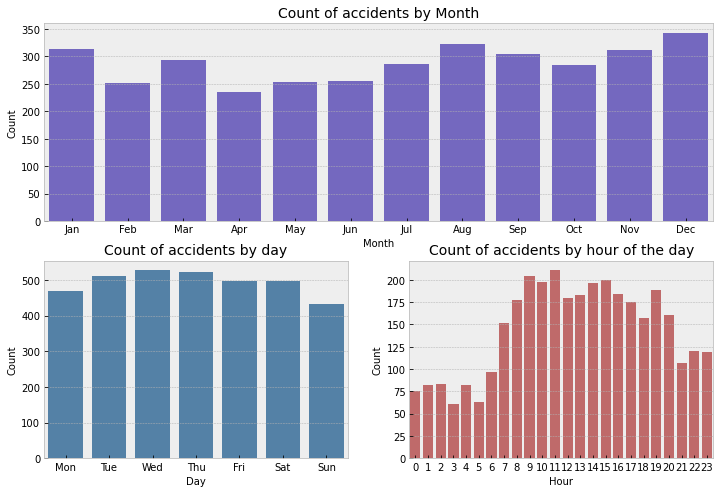

In [11]:
temp_month = df.groupby(df.DateTime.dt.month)[['DateTime']].size().to_frame('Count').reset_index()
temp_day = df.groupby(df.DateTime.dt.weekday)[['DateTime']].size().to_frame('Count').reset_index()
temp_hour = df.groupby(df.DateTime.dt.hour)[['DateTime']].size().to_frame('Count').reset_index()

fig = plt.figure(figsize=(12,8))
grid = gridspec.GridSpec(2, 2)
plt.style.use('bmh')

#first row
ax1 = fig.add_subplot(grid[0, :])
sns.barplot('DateTime', 'Count', data=temp_month, color='slateblue', linewidth=2)
plt.xticks(temp_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14);

#second row, first column
ax2 = fig.add_subplot(grid[1, 0])
sns.barplot('DateTime', 'Count', data=temp_day, color='steelblue', linewidth=2)
plt.xticks(temp_day.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by day', loc='Center', fontsize=14);

#second row, second column
ax3 = fig.add_subplot(grid[1, 1])
sns.barplot('DateTime', 'Count', data=temp_hour, color='indianred', linewidth=2)
plt.xticks(temp_hour.index)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by hour of the day', loc='Center', fontsize=14);

## Military vs Passenger Flights

In [12]:
df['Military'] = df['Operator'].str.contains('Military')
df['Passenger'] = df.Military == False
temp = df.groupby(df.DateTime.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)
temp.head()

,Military,Passenger
DateTime,,
1908,1,0
1912,1,0
1913,2,0
1915,2,0
1916,3,0


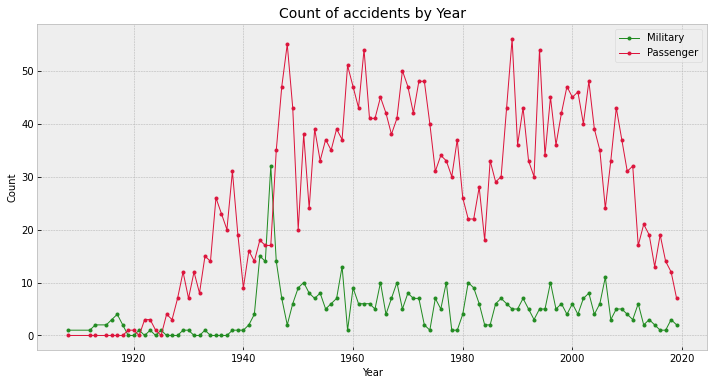

In [13]:
plt.figure(figsize=(12,6))
plt.plot(temp.index, 'Military', data=temp, color='forestgreen', marker = ".", linewidth=1)
plt.plot(temp.index, 'Passenger', data=temp, color='crimson', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

# Fatalities

In [14]:
fatalities = df.groupby(df.DateTime.dt.year).sum()
fatalities.tail()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Passenger
DateTime,,,,,,,,
2015,738.0,674.0,64.0,701.0,640.0,61.0,21.0,13.0
2016,791.0,697.0,94.0,483.0,411.0,72.0,1.0,19.0
2017,241.0,192.0,49.0,210.0,171.0,39.0,35.0,14.0
2018,1191.0,1103.0,88.0,826.0,767.0,59.0,2.0,12.0
2019,305.0,267.0,38.0,267.0,234.0,33.0,14.0,7.0


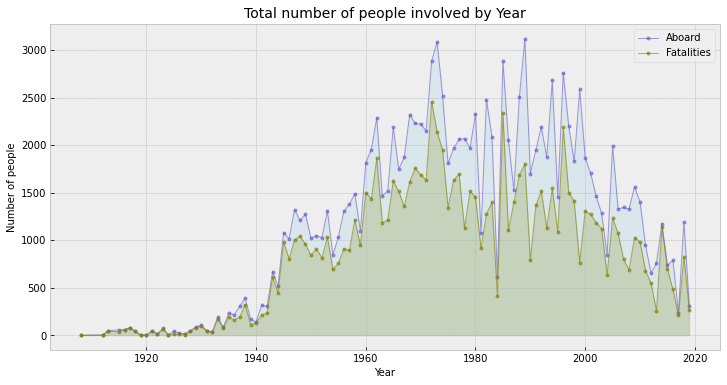

In [15]:
# People aboard vs fatalities: fill between

plt.figure(figsize=(12,6))
plt.fill_between(fatalities.index, 'Aboard', data=fatalities, color="skyblue", alpha=0.2)
plt.plot(fatalities.index, 'Aboard', data=fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)

plt.fill_between(fatalities.index, 'Fatalities', data=fatalities, color="olive", alpha=0.2)
plt.plot(fatalities.index, 'Fatalities', data=fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)

plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14);

## Operators

In [16]:
total_by_op = df.groupby('Operator').size().to_frame('Count')
total_by_op = total_by_op.sort_values(by='Count', ascending=False).head(15)
total_by_op.head()

,Count
Operator,
Aeroflot,222
Military - U.S. Air Force,99
Air France,47
United Air Lines,44
Military - U.S. Army Air Forces,41


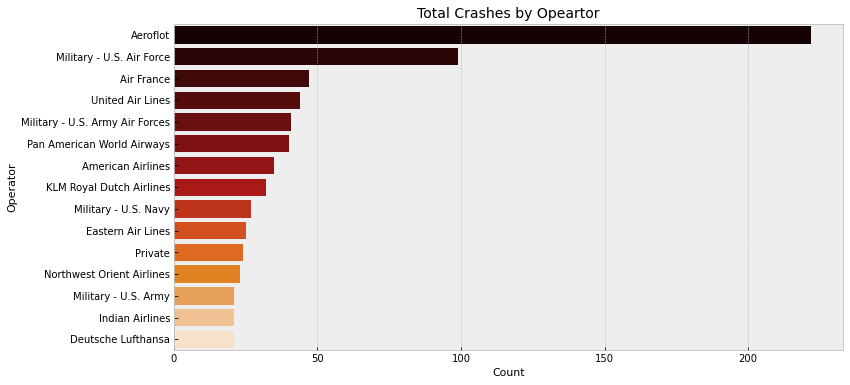

In [17]:
## Crashes by operator

plt.figure(figsize=(12,6))
sns.barplot(y=total_by_op.index, x="Count", data=total_by_op, palette="gist_heat", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Crashes by Opeartor', loc='Center', fontsize=14)
plt.show()

In [18]:
fat_by_op = df.groupby('Operator').sum().sort_values(by='Fatalities', ascending=False).head(15)
#total_by_op = total_by_op.sort_values(by='Count', ascending=False).head(15)
fat_by_op.head()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Passenger
Operator,,,,,,,,
Aeroflot,10452.0,9129.0,1335.0,8120.0,7015.0,1098.0,35.0,222.0
Military - U.S. Air Force,3503.0,2739.0,702.0,2878.0,2232.0,610.0,154.0,0.0
Air France,2444.0,2135.0,309.0,1588.0,1345.0,243.0,5.0,47.0
American Airlines,2091.0,1914.0,177.0,1421.0,1299.0,122.0,2889.0,35.0
Pan American World Airways,2812.0,2448.0,334.0,1302.0,1094.0,184.0,20.0,40.0


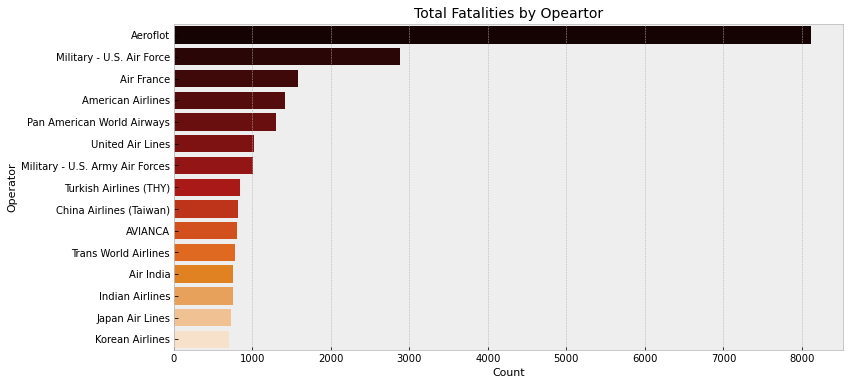

In [19]:
## Fatalities by operator

plt.figure(figsize=(12,6))
sns.barplot(y=fat_by_op.index, x="Fatalities", data=fat_by_op, palette="gist_heat", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()